In [105]:
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
A = Species("Glutamic_acid")
B = Species("Arginine")
C = Species("Ornithine")
D = Species("Spermine")
E = Species("Putrescine")
F = Species("Agmatine")
G = Species("Spermine")
H = Species("Spermidine")
Arg2 = Species("Arg2_enzyme")
AsADC = Species ("AsADC_enzyme")
speB = Species ("speB_enzyme")
Car1 = Species ("Car1_enzyme")
Spe1 = Species ("Spe1_enzyme")

#Reaction Rate
k1 = 1.0
k2 = 1.0
k3 = 1.0 
k4 = 1.0
k5 = 1.0
k6 = 1.0

#Reaction from Glutamic acid --> Arginine
R1 = Reaction.from_massaction([A,Arg2], [B], k_forward = k1)

#Parrallel Reaction from Arginine --> Agmatine
R2 = Reaction.from_massaction([B, AsADC], [F], k_forward = k2)
R3 = Reaction.from_massaction ([F,speB], [E], k_forward = k3)


#Parrallel Reaction from Arginine --> Ornithine
R4 = Reaction.from_massaction([B, Car1], [C], k_forward = k4)
R5 = Reaction.from_massaction ([C,Spe1], [E], k_forward = k5)
R6 = Reaction.from_massaction ([C,F,H], [E], k_forward = k6)


#Make a CRN
CRN = ChemicalReactionNetwork(species = [A, B, C, D, E, F, G, H, Arg2, speB, Car1, Spe1], reactions = [R1, R2, R3, R4, R5, R6])
print ("MODULE 3: PLA glucoside biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials = True, show_rates = True, show_attributes = True))

MODULE 3: PLA glucoside biosynthesis
Species = Glutamic_acid, Arginine, Ornithine, Spermine, Putrescine, Agmatine, Spermidine, Arg2_enzyme, speB_enzyme, Car1_enzyme, Spe1_enzyme, AsADC_enzyme
Species(N = 12) = {
speB_enzyme (@ 0),  Spermine (@ 0),  Spermidine (@ 0),  Spe1_enzyme (@ 0),  Putrescine (@ 0),  Ornithine (@ 0),  Glutamic_acid (@ 0),  Car1_enzyme (@ 0),  AsADC_enzyme (@ 0),  Arginine (@ 0),  Arg2_enzyme (@ 0),  Agmatine (@ 0),  
}

Reactions (6) = [
0. Glutamic_acid+Arg2_enzyme --> Arginine
 Kf=k_forward * Glutamic_acid * Arg2_enzyme
  k_forward=1.0

1. Arginine+AsADC_enzyme --> Agmatine
 Kf=k_forward * Arginine * AsADC_enzyme
  k_forward=1.0

2. Agmatine+speB_enzyme --> Putrescine
 Kf=k_forward * Agmatine * speB_enzyme
  k_forward=1.0

3. Arginine+Car1_enzyme --> Ornithine
 Kf=k_forward * Arginine * Car1_enzyme
  k_forward=1.0

4. Ornithine+Spe1_enzyme --> Putrescine
 Kf=k_forward * Ornithine * Spe1_enzyme
  k_forward=1.0

5. Ornithine+Agmatine+Spermidine --> Putrescine
 Kf=

MODULE 1: PUTRESCINE BIOSYNTHESIS
Species = Glutamic_acid, Arginine, Ornithine, Spermine, Putrescine, Agmatine, Spermidine, Arg2_enzyme, AsADC_enzyme, speB_enzyme, Car1_enzyme, Spe1_enzyme, Fms1_enzyme
Reactions = [
	First and Second Biochemical Route: Glumatic_Acid → Putrescine
	Glutamic_acid+Arg2_enzyme --> Arginine

	Parallel Reactions: Path 1 - Arginine → Agmatine → Putrescine
	Arginine+AsADC_enzyme --> Agmatine
	Agmatine+speB_enzyme --> Putrescine

	Parallel Reactions: Path 2 - Arginine → Ornithine → Putrescine
	Arginine+Car1_enzyme --> Ornithine
	Ornithine+Spe1_enzyme --> Putrescine

	Third Biochemical Route: Spermine → Spermidine → Putrescine
	Spermine+Fms1_enzyme --> Spermidine
	Spermidine+Fms1_enzyme --> Putrescine
]


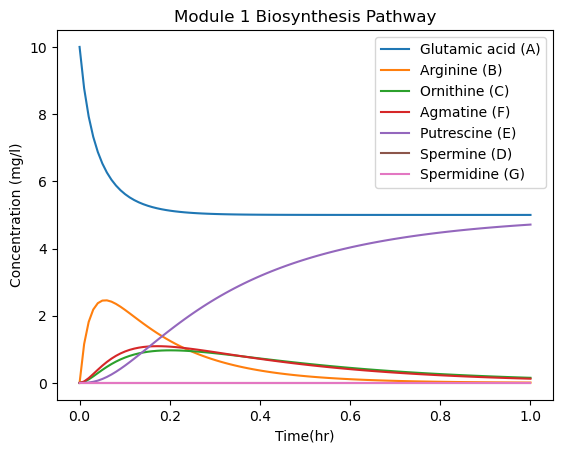

In [6]:
# Module 1: Putrescine Biosynthesis Pathway
# This module describes the biosynthesis of putrescine from glutamic acid through multiple biochemical routes

from biocrnpyler import Species, Reaction, ChemicalReactionNetwork

# Define species
A = Species("Glutamic_acid")
B = Species("Arginine")
C = Species("Ornithine")
D = Species("Spermine")
E = Species("Putrescine")
F = Species("Agmatine")
G = Species("Spermidine")

# Enzymes
Arg2 = Species("Arg2_enzyme")
AsADC = Species("AsADC_enzyme")
speB = Species("speB_enzyme")
Car1 = Species("Car1_enzyme")
Spe1 = Species("Spe1_enzyme")
Fms1 = Species("Fms1_enzyme") 

# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0

# Reactions
R1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)

# Parallel Path 1: Arginine → Agmatine → Putrescine 
R2 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)
R3 = Reaction.from_massaction([F, speB], [E], k_forward=k2)

# Parallel Path 2: Arginine → Ornithine → Putrescine
R4 = Reaction.from_massaction([B, Car1], [C], k_forward=k3)
R5 = Reaction.from_massaction([C, Spe1], [E], k_forward=k3)

# 3rd Biochemical Route: Spermine → Spermidine → Putrescine
R6 = Reaction.from_massaction([D, Fms1,], [G], k_forward=k4)
R7 = Reaction.from_massaction([G, Fms1,], [E], k_forward=k4)

# Create CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1],
    reactions=[R1, R2, R3, R4, R5, R6, R7])

# Custom output with parallel reaction labeling
print ("MODULE 1: PUTRESCINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tFirst and Second Biochemical Route: Glumatic_Acid → Putrescine")
print(f"\t{R1}")  # Glutamic_acid + Arg2_enzyme --> Arginine

#Blank Line
print()

# Parallel Path 1
print("\tParallel Reactions: Path 1 - Arginine → Agmatine → Putrescine")
print(f"\t{R2}")  # Arginine + AsADC_enzyme --> Agmatine
print(f"\t{R3}")  # Agmatine + speB_enzyme --> Putrescine

#Blank Line
print()

# Parallel Path 2
print("\tParallel Reactions: Path 2 - Arginine → Ornithine → Putrescine")
print(f"\t{R4}")  # Arginine + Car1_enzyme --> Ornithine
print(f"\t{R5}")  # Ornithine + Spe1_enzyme --> Putrescine

#Blank Line
print()

# Third Biochemical Route
print("\tThird Biochemical Route: Spermine → Spermidine → Putrescine")
print(f"\t{R6}")  # Spermine + Fms1_enzyme --> Spermidine
print(f"\t{R7}")  # Spermidine + Fms1_enzyme --> Putrescine
print("]")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd

    # Correct initial conditions
    x0 = {
        "Glutamic_acid": 10,
        "Arginine": 0,
        "Ornithine": 0,
        "Spermine": 0,
        "Putrescine": 0,
        "Agmatine": 0,
        "Spermidine": 0,
        "Arg2_enzyme": 5,
        "AsADC_enzyme": 5,
        "speB_enzyme": 5,
        "Car1_enzyme": 5,
        "Spe1_enzyme": 5,
        "Fms1_enzyme": 5
    }

    timepoints = np.linspace(0, 1, 100)

    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plot results
    plt.plot(R['time'], R["Glutamic_acid"], label="Glutamic acid (A)")
    plt.plot(R['time'], R["Arginine"], label="Arginine (B)")
    plt.plot(R['time'], R["Ornithine"], label="Ornithine (C)")
    plt.plot(R['time'], R["Agmatine"], label="Agmatine (F)")
    plt.plot(R['time'], R["Putrescine"], label="Putrescine (E)")
    plt.plot(R['time'], R["Spermine"], label="Spermine (D)")
    plt.plot(R['time'], R["Spermidine"], label="Spermidine (G)")
    plt.legend()
    plt.xlabel("Time(hr)")
    plt.ylabel("Concentration (mg/l)")
    plt.title("Module 1 Biosynthesis Pathway")
    

except ModuleNotFoundError:
    print("Plotting Modules not installed.")


In [ ]:
# Module 1: Putrescine Biosynthesis Pathway
# This module describes the biosynthesis of putrescine from glutamic acid through multiple biochemical routes

from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
# Define species (cytosolic metabolites)
A = Species("Glutamic_acid", compartment="cytosol")
B = Species("Arginine", compartment="cytosol")
C = Species("Ornithine", compartment="cytosol")
D = Species("Spermine", compartment="cytosol")
E = Species("Putrescine", compartment="cytosol")
F = Species("Agmatine", compartment="cytosol")
G = Species("Spermidine", compartment="cytosol")

# Enzymes (cytosolic)
Arg2  = Species("Arg2_enzyme", compartment="cytosol")
AsADC = Species("AsADC_enzyme", compartment="cytosol")
speB  = Species("speB_enzyme", compartment="cytosol")
Car1  = Species("Car1_enzyme", compartment="cytosol")
Spe1  = Species("Spe1_enzyme", compartment="cytosol")
Fms1  = Species("Fms1_enzyme", compartment="cytosol") 


# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0

# Reactions
R1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)

# Parallel Path 1: Arginine → Agmatine → Putrescine 
R2 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)
R3 = Reaction.from_massaction([F, speB], [E], k_forward=k2)

# Parallel Path 2: Arginine → Ornithine → Putrescine
R4 = Reaction.from_massaction([B, Car1], [C], k_forward=k3)
R5 = Reaction.from_massaction([C, Spe1], [E], k_forward=k3)

# 3rd Biochemical Route: Spermine → Spermidine → Putrescine
R6 = Reaction.from_massaction([D, Fms1,], [G], k_forward=k4)
R7 = Reaction.from_massaction([G, Fms1,], [E], k_forward=k4)

# Create CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1],
    reactions=[R1, R2, R3, R4, R5, R6, R7])

# Custom output with parallel reaction labeling
print ("MODULE 1: PUTRESCINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tFirst and Second Biochemical Route: Glumatic_Acid → Putrescine")
print(f"\t{R1}")  # Glutamic_acid + Arg2_enzyme --> Arginine

#Blank Line
print()

# Parallel Path 1
print("\tParallel Reactions: Path 1 - Arginine → Agmatine → Putrescine")
print(f"\t{R2}")  # Arginine + AsADC_enzyme --> Agmatine
print(f"\t{R3}")  # Agmatine + speB_enzyme --> Putrescine

#Blank Line
print()

# Parallel Path 2
print("\tParallel Reactions: Path 2 - Arginine → Ornithine → Putrescine")
print(f"\t{R4}")  # Arginine + Car1_enzyme --> Ornithine
print(f"\t{R5}")  # Ornithine + Spe1_enzyme --> Putrescine

#Blank Line
print()

# Third Biochemical Route
print("\tThird Biochemical Route: Spermine → Spermidine → Putrescine")
print(f"\t{R6}")  # Spermine + Fms1_enzyme --> Spermidine
print(f"\t{R7}")  # Spermidine + Fms1_enzyme --> Putrescine
print("]")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd

    # Correct initial conditions
    x0 = {
        "Glutamic_acid": 10,
        "Arginine": 0,
        "Ornithine": 0,
        "Spermine": 0,
        "Putrescine": 0,
        "Agmatine": 0,
        "Spermidine": 0,
        "Arg2_enzyme": 5,
        "AsADC_enzyme": 5,
        "speB_enzyme": 5,
        "Car1_enzyme": 5,
        "Spe1_enzyme": 5,
        "Fms1_enzyme": 5
    }

    timepoints = np.linspace(0, 1, 100)

    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plot results
    plt.plot(R['time'], R["Glutamic_acid"], label="Glutamic acid (A)")
    plt.plot(R['time'], R["Arginine"], label="Arginine (B)")
    plt.plot(R['time'], R["Ornithine"], label="Ornithine (C)")
    plt.plot(R['time'], R["Agmatine"], label="Agmatine (F)")
    plt.plot(R['time'], R["Putrescine"], label="Putrescine (E)")
    plt.plot(R['time'], R["Spermine"], label="Spermine (D)")
    plt.plot(R['time'], R["Spermidine"], label="Spermidine (G)")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Module 1 Biosynthesis Pathway")
    

except ModuleNotFoundError:
    print("Plotting Modules not installed.")


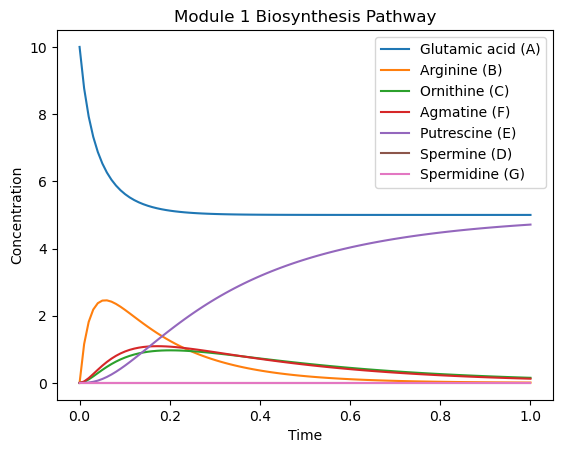

In [99]:
CRN.write_sbml_file("Module_1.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd

    # Correct initial conditions
    x0 = {
        "Glutamic_acid": 10,
        "Arginine": 0,
        "Ornithine": 0,
        "Spermine": 0,
        "Putrescine": 0,
        "Agmatine": 0,
        "Spermidine": 0,
        "Arg2_enzyme": 5,
        "AsADC_enzyme": 5,
        "speB_enzyme": 5,
        "Car1_enzyme": 5,
        "Spe1_enzyme": 5,
        "Fms1_enzyme": 5
    }

    timepoints = np.linspace(0, 1, 100)

    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plot results
    plt.plot(R['time'], R["Glutamic_acid"], label="Glutamic acid (A)")
    plt.plot(R['time'], R["Arginine"], label="Arginine (B)")
    plt.plot(R['time'], R["Ornithine"], label="Ornithine (C)")
    plt.plot(R['time'], R["Agmatine"], label="Agmatine (F)")
    plt.plot(R['time'], R["Putrescine"], label="Putrescine (E)")
    plt.plot(R['time'], R["Spermine"], label="Spermine (D)")
    plt.plot(R['time'], R["Spermidine"], label="Spermidine (G)")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Module 1 Biosynthesis Pathway")
    

except ModuleNotFoundError:
    print("Plotting Modules not installed.")


Module 1
Species(N = 15) = {
speB_enzyme (@ 0),  Spermine (@ 0),  Spermidine (@ 0),  SpeG_enzyme (@ 0),  SpeE_enzyme (@ 0),  Spe1_enzyme (@ 0),  Putrescine (@ 0),  Ornithine (@ 0),  Glutamic_acid (@ 0),  Fms1_enzyme (@ 0),  Car1_enzyme (@ 0),  AsADC_enzyme (@ 0),  Arginine (@ 0),  Arg2_enzyme (@ 0),  Agmatine (@ 0),  
}

Reactions (7) = [
0. Glutamic_acid+Arg2_enzyme --> Arginine
 Kf=k_forward * Glutamic_acid_cytosol * Arg2_enzyme_cytosol
  k_forward=1.0

1. Arginine+AsADC_enzyme --> Agmatine
 Kf=k_forward * Arginine_cytosol * AsADC_enzyme_cytosol
  k_forward=1.0

2. Agmatine+speB_enzyme --> Putrescine
 Kf=k_forward * Agmatine_cytosol * speB_enzyme_cytosol
  k_forward=1.0

3. Arginine+Car1_enzyme --> Ornithine
 Kf=k_forward * Arginine_cytosol * Car1_enzyme_cytosol
  k_forward=1.0

4. Ornithine+Spe1_enzyme --> Putrescine
 Kf=k_forward * Ornithine_cytosol * Spe1_enzyme_cytosol
  k_forward=1.0

5. Putrescine+SpeE_enzyme --> Spermidine
 Kf=k_forward * Putrescine_cytosol * SpeE_enzyme_cytos

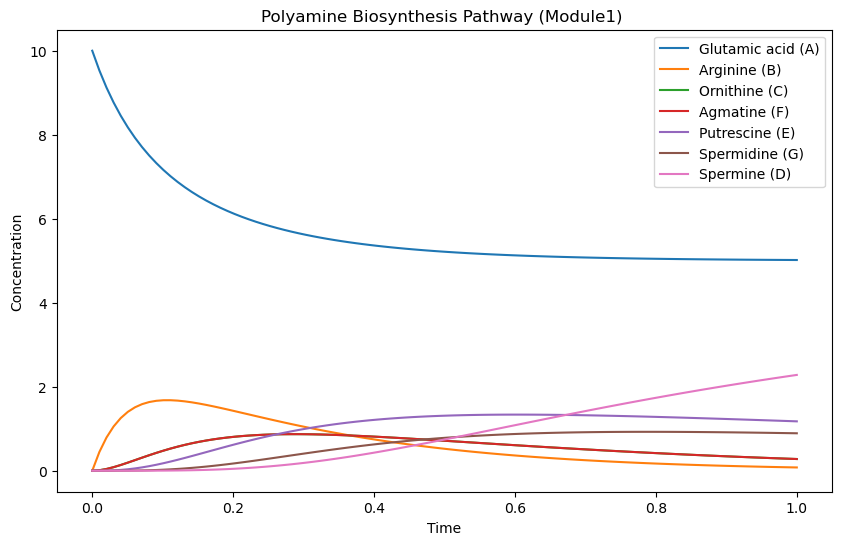

In [ ]:
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork

# Define species (cytosolic metabolites)
A = Species("Glutamic_acid", compartment="cytosol")
B = Species("Arginine", compartment="cytosol")
C = Species("Ornithine", compartment="cytosol")
D = Species("Spermine", compartment="cytosol")
E = Species("Putrescine", compartment="cytosol")
F = Species("Agmatine", compartment="cytosol")
G = Species("Spermidine", compartment="cytosol")

# Enzymes (cytosolic)
Arg2  = Species("Arg2_enzyme", compartment="cytosol")
AsADC = Species("AsADC_enzyme", compartment="cytosol")
speB  = Species("speB_enzyme", compartment="cytosol")
Car1  = Species("Car1_enzyme", compartment="cytosol")
Spe1  = Species("Spe1_enzyme", compartment="cytosol")
SpeE  = Species("SpeE_enzyme", compartment="cytosol")
SpeG  = Species("SpeG_enzyme", compartment="cytosol")
Fms1  = Species("Fms1_enzyme", compartment="cytosol") 

# Reaction rates
k1 = 1.0
k2 = 1.0
k3 = 1.0
k4 = 1.0
k5 = 1.0
k6 = 1.0
k7 = 1.0

# Reactions
R1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)        # Glutamic acid → Arginine
R2 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)       # Arginine → Agmatine
R3 = Reaction.from_massaction([F, speB], [E], k_forward=k3)        # Agmatine → Putrescine
R4 = Reaction.from_massaction([B, Car1], [C], k_forward=k4)        # Arginine → Ornithine
R5 = Reaction.from_massaction([C, Spe1], [E], k_forward=k5)        # Ornithine → Putrescine
R6 = Reaction.from_massaction([E, SpeE], [G], k_forward=k6)        # Putrescine → Spermidine
R7 = Reaction.from_massaction([G, SpeG], [D], k_forward=k7)        # Spermidine → Spermine

# Build the CRN
species = [A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, SpeE, SpeG, Fms1]
reactions = [R1, R2, R3, R4, R5, R6, R7]
CRN = ChemicalReactionNetwork(species=species, reactions=reactions)

print("Module 1")
print(CRN.pretty_print(show_materials=True, show_rates=True, show_attributes=True))

# Simulate and plot
# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    # Initial conditions (with correct '_cytosol' names)
    x0 = {
        "Glutamic_acid_cytosol": 10,
        "Arginine_cytosol": 0,
        "Ornithine_cytosol": 0,
        "Spermine_cytosol": 0,
        "Putrescine_cytosol": 0,
        "Agmatine_cytosol": 0,
        "Spermidine_cytosol": 0,
        "Arg2_enzyme_cytosol": 5,
        "AsADC_enzyme_cytosol": 5,
        "speB_enzyme_cytosol": 5,
        "Car1_enzyme_cytosol": 5,
        "Spe1_enzyme_cytosol": 5,
        "SpeE_enzyme_cytosol": 5,
        "SpeG_enzyme_cytosol": 5,
        "Fms1_enzyme_cytosol": 5
    }

    timepoints = np.linspace(0, 1, 100)

    # Simulate
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Glutamic_acid_cytosol"], label="Glutamic acid (A)")
    plt.plot(R['time'], R["Arginine_cytosol"], label="Arginine (B)")
    plt.plot(R['time'], R["Ornithine_cytosol"], label="Ornithine (C)")
    plt.plot(R['time'], R["Agmatine_cytosol"], label="Agmatine (F)")
    plt.plot(R['time'], R["Putrescine_cytosol"], label="Putrescine (E)")
    plt.plot(R['time'], R["Spermidine_cytosol"], label="Spermidine (G)")
    plt.plot(R['time'], R["Spermine_cytosol"], label="Spermine (D)")
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Polyamine Biosynthesis Pathway (Module1) ")
    plt.legend()
    

except ModuleNotFoundError:
    print("Plotting or bioscrape modules not installed.")

     



In [110]:
R

,Glutamic_acid_cytosol,Arginine_cytosol,Ornithine_cytosol,Spermine_cytosol,Putrescine_cytosol,Agmatine_cytosol,Spermidine_cytosol,Arg2_enzyme_cytosol,AsADC_enzyme_cytosol,speB_enzyme_cytosol,Car1_enzyme_cytosol,Spe1_enzyme_cytosol,SpeE_enzyme_cytosol,SpeG_enzyme_cytosol,Fms1_enzyme_cytosol,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010101
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020202
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030303
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.959596
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.969697
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979798
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989899


 Module III: PLA glucoside biosynthesis

In [4]:
from biocrnpyler import *

# Define species
Phe = Species("Phenylalanine")
PPA = Species("Phenylpyruvic_acid")
PLA = Species("Phenyllactic_acid")
PLA_glucoside = Species("Phenyllactic_acid_glucoside")

# Enzymes
Aro = Species("Aro_enzyme")  # Aro8/Aro9
WfPPR = Species("WfPPR_enzyme")
AbUGT = Species("AbUGT_enzyme")
Egh1 = Species("Egh1_enzyme")  # Inhibitor of glucosylation

# Reaction rates
k1 = 1.0
k2 = 1.0
k3 = 1.0 


# Reactions
#Phenylalanine → Phenylpyruvic acid via Aro8 / Aro9
R1 = Reaction.from_massaction([Phe, Aro], [PPA], k_forward =k1)
#Phenylpyruvic acid → Phenyllactic acid (PLA) via WfPPR 
R2 = Reaction.from_massaction([PPA, WfPPR], [PLA], k_forward = k2)

R3 = Reaction.from_massaction([PLA, AbUGT], [PLA_glucoside], k_forward = k3)
# PLA glucosylation inhibited by Egh1
hill_neg = HillNegative(k=1.0, s1=Egh1, K=1.0, n=2)
R3 = Reaction([PLA, AbUGT], [PLAG], propensity_type=hill_neg)



# Build CRN
species = [Phe, PPA, PLA, PLAG, Aro, WfPPR, AbUGT, Egh1]
reactions = [R1, R2, R3]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("MODULE 3: PLA glucoside biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials = True, show_rates = True, show_attributes = True))

MODULE 3: PLA glucoside biosynthesis
Species = Phenylalanine, Phenylpyruvic_acid, Phenyllactic_acid, Phenyllactic_acid_glucoside, Aro_enzyme, WfPPR_enzyme, AbUGT_enzyme, Egh1_enzyme
Species(N = 8) = {
WfPPR_enzyme (@ 0),  Phenylpyruvic_acid (@ 0),  Phenyllactic_acid_glucoside (@ 0),  Phenyllactic_acid (@ 0),  Phenylalanine (@ 0),  Egh1_enzyme (@ 0),  Aro_enzyme (@ 0),  AbUGT_enzyme (@ 0),  
}

Reactions (3) = [
0. Phenylalanine+Aro_enzyme --> Phenylpyruvic_acid
 Kf=k_forward * Phenylalanine * Aro_enzyme
  k_forward=1.0

1. Phenylpyruvic_acid+WfPPR_enzyme --> Phenyllactic_acid
 Kf=k_forward * Phenylpyruvic_acid * WfPPR_enzyme
  k_forward=1.0

2. Phenyllactic_acid+AbUGT_enzyme --> Phenyllactic_acid_glucoside
 Kf = k / ( 1 + (Egh1_enzyme/K)^n )
  k=1.0
  K=1.0
  n=2

]


c:\Users\pamea\anaconda3\Lib\site-packages\biocrnpyler\chemical_reaction_network.py:362: UserWarning: Trying to set species that is not in model: PLA_glucoside
  m.set_species(processed)


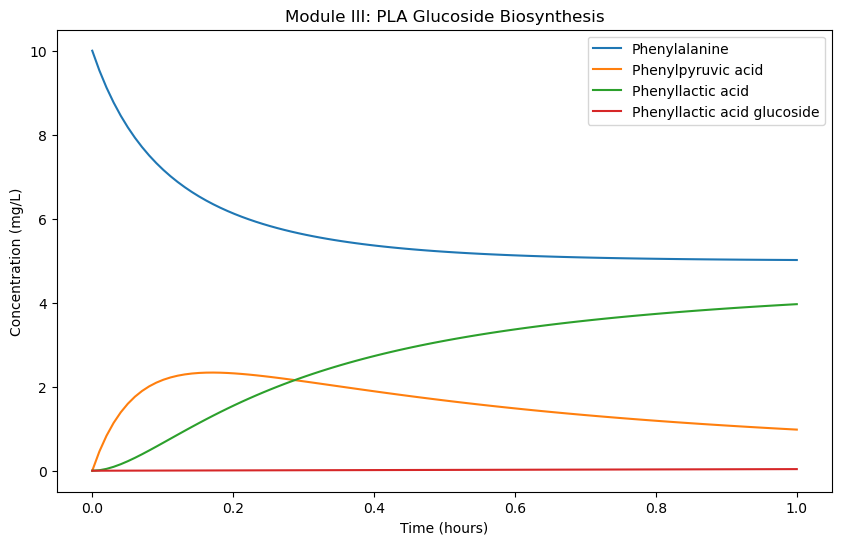

In [5]:
CRN.write_sbml_file("Module_2.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    # Correct initial conditions
    x0 = {
        "Phenylalanine": 10,
        "Phenylpyruvic_acid": 0,
        "Phenyllactic_acid": 0,
        "PLA_glucoside": 0,
        "Aro_enzyme": 5,
        "WfPPR_enzyme": 5,
        "AbUGT_enzyme": 5,
        "Egh1_enzyme": 5
    }
    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Phenylalanine"], label="Phenylalanine")
    plt.plot(R['time'], R["Phenylpyruvic_acid"], label="Phenylpyruvic acid")
    plt.plot(R['time'], R["Phenyllactic_acid"], label="Phenyllactic acid")
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside"], label="Phenyllactic acid glucoside")
    plt.legend()
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration (mg/L)")
    plt.title("Module III: PLA Glucoside Biosynthesis")
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")
    
    

Module V

In [86]:
from biocrnpyler import *

# Define species
Tropine = Species("Tropine")                  # Acyl acceptor
PLAG = Species("Phenyllactic_acid_glucoside") # Acyl donor
Littorine = Species("Littorine")              # Product

# Transporter and enzyme
NtJAT1 = Species("NtJAT1_transporter")        # Tropine transporter
AbLS_DsRed = Species("AbLS_DsRed_enzyme")  #enzyme (Littorine synthase)
# Reaction rates
k1 = 1.0
k2 = 1.0
k3 = 1.0 
# Reactions
# Tropine → Tropine (catalyzed by NtJAT1)
R1 = Reaction.from_massaction([Tropine, NtJAT1], [Tropine], k_forward=k1)
# PLA-glucoside + Tropine → Littorine (catalyzed by AbLS_DsRed)
R2 = Reaction.from_massaction([PLAG, Tropine, AbLS_DsRed], [Littorine], k_forward=k2)
# Assemble CRN
species = [Tropine, PLAG, Littorine, NtJAT1, AbLS_DsRed]
reactions = [R1, R2]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("Module V: TA scaffold biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials=True, show_rates=True, show_attributes=True))


Module V: TA scaffold biosynthesis
Species = Tropine, Phenyllactic_acid_glucoside, Littorine, NtJAT1_transporter, AbLS_DsRed_enzyme
Species(N = 5) = {
Tropine (@ 0),  Phenyllactic_acid_glucoside (@ 0),  NtJAT1_transporter (@ 0),  Littorine (@ 0),  AbLS_DsRed_enzyme (@ 0),  
}

Reactions (2) = [
0. Tropine+NtJAT1_transporter --> Tropine
 Kf=k_forward * Tropine * NtJAT1_transporter
  k_forward=1.0

1. Phenyllactic_acid_glucoside+Tropine+AbLS_DsRed_enzyme --> Littorine
 Kf=k_forward * Phenyllactic_acid_glucoside * Tropine * AbLS_DsRed_enzyme
  k_forward=1.0

]


True

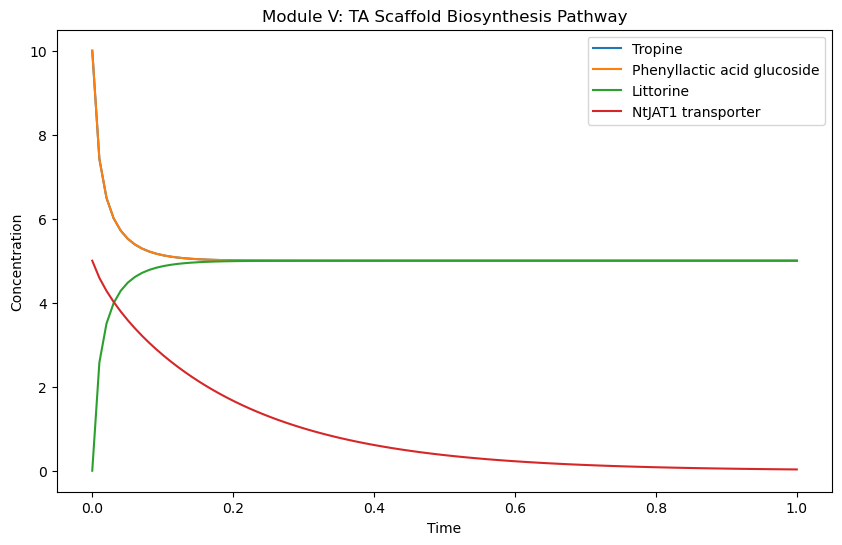

In [ ]:
# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    # Correct initial conditions
    x0 = {
        "Tropine": 10,
        "Phenyllactic_acid_glucoside": 10,
        "Littorine": 0,
        "NtJAT1_transporter": 5,
        "AbLS_DsRed_enzyme": 5
    }
    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Tropine"], label="Tropine")
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside"], label="Phenyllactic acid glucoside")
    plt.plot(R['time'], R["Littorine"], label="Littorine")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Module V: TA Scaffold Biosynthesis Pathway")
    subplots_adjust(top=0.85)
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

# Save the CRN to an SBML file
CRN.write_sbml_file("Module_5.xml")




